## Observations and Insights 

In [93]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset    
combined_mice_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
combined_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [94]:
# Checking the number of mice in the DataFrame.
len(combined_mice_df['Mouse ID'].unique())

249

In [95]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupID = combined_mice_df[combined_mice_df.duplicated(['Mouse ID', 'Timepoint'])]
dupID['Mouse ID'].unique()

array(['g989'], dtype=object)

In [96]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateID = combined_mice_df[combined_mice_df['Mouse ID'] == "g989"]
duplicateID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [97]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = combined_mice_df[combined_mice_df['Mouse ID'] != "g989"]
clean_mice_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [98]:
# Checking the number of mice in the clean DataFrame.
len(clean_mice_df['Mouse ID'].unique())

248

## Summary Statistics

In [99]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group by Drug Regimen
# drugRegimen_gb = clean_mice_df.groupby(["Drug Regimen"])

# Calculations for tumor data
mean_tumor_vol = clean_mice_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_median = clean_mice_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_var = clean_mice_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_stdev = clean_mice_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_sem = clean_mice_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

tumor_summary_df = pd.DataFrame({"Mean Tumor Volume":mean_tumor_vol,
                              "Median Tumor Volume": tumor_median,
                              "Tumor Volume Variance": tumor_var,
                              "Tumor Volume Std. Dev.": tumor_stdev,
                              "Tumor Volume Std. Err.": tumor_sem})
tumor_summary_df


# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [100]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# This method produces everything in a single groupby function.

## Bar Plots

Text(0.5, 0, 'Drug Regimen')

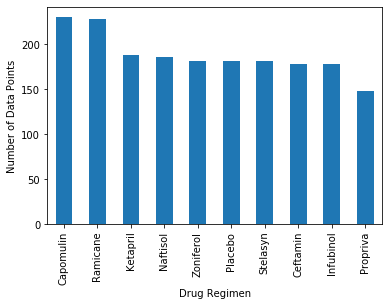

In [101]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

# Gather and sort data for plot
mice_per_timepoint = clean_mice_df.groupby('Drug Regimen').count()['Timepoint']

mice_per_datapoint = mice_per_timepoint.reset_index()

mice_per_datapoint = mice_per_datapoint.sort_values("Timepoint", ascending=False)

mice_per_datapoint = mice_per_datapoint.set_index("Drug Regimen")

# Plot
mice_per_datapoint.plot(kind="bar", legend=False)
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")

Text(0.5, 0, 'Drug Regimen')

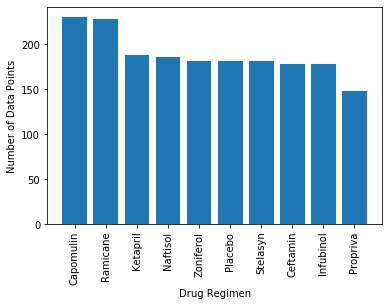

In [102]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

# Gather and sort data for plot
mice_per_timepoint2 = clean_mice_df.groupby('Drug Regimen').count()['Timepoint']

mice_per_datapoint2 = mice_per_timepoint2.reset_index()

mice_per_datapoint2 = mice_per_datapoint2.sort_values("Timepoint", ascending=False)

# Plot
plt.bar(mice_per_datapoint2['Drug Regimen'], mice_per_datapoint2['Timepoint'])
plt.xticks(rotation="vertical")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")

## Pie Plots

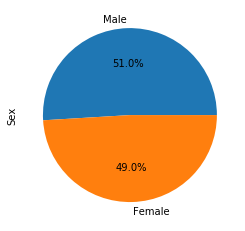

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# gather data for pie chart
mice_gender = clean_mice_df.Sex.value_counts()

# plot
mice_gender.plot(kind="pie", autopct="%1.1f%%")

Text(0, 0.5, 'Sex')

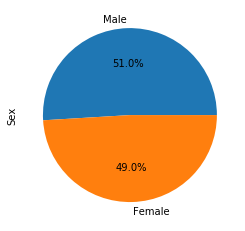

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# gather data for pie chart
mice_gender2 = clean_mice_df.Sex.value_counts()
# mice_gender2

# Plot
labels = ['Male', 'Female']
sizes = [958, 922]

plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
